# DiscRates class

This class contains the discount rates for every year and discounts given values. Its attributes are:

 * tag (Tag): information about the source data
 * years (np.array): years
 * rates (np.array): discount rates for each year (between 0 and 1)

**In CLIMADA 2.0.0 upwards, the import from DiscRates is: from climada.entity.disc_rates import DiscRates**

In [10]:
#CLIMADA 1.x.x
#from climada.entity import DiscRates
#CLIMADA 2.0.0
from climada.entity.disc_rates import DiscRates
help(DiscRates)

Help on class DiscRates in module climada.entity.disc_rates.base:

class DiscRates(builtins.object)
 |  Defines discount rates and basic methods. Loads from
 |  files with format defined in FILE_EXT.
 |  
 |  Attributes:
 |      tag (Tag): information about the source data
 |      years (np.array): years
 |      rates (np.array): discount rates for each year (between 0 and 1)
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Empty initialization.
 |      
 |      Examples:
 |          Fill discount rates with values and check consistency data:
 |      
 |          >>> disc_rates = DiscRates()
 |          >>> disc_rates.years = np.array([2000, 2001])
 |          >>> disc_rates.rates = np.array([0.02, 0.02])
 |          >>> disc_rates.check()
 |      
 |          Read discount rates from year_2050.mat and checks consistency data.
 |      
 |          >>> disc_rates = DiscRates(ENT_TEMPLATE_XLS)
 |  
 |  append(self, disc_rates)
 |      Check and append discount rates to curr

An example of use:

net present value: 1.01099e+08


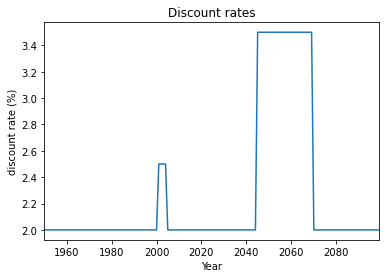

In [11]:
%matplotlib inline
import numpy as np
#CLIMADA 1.x.x
#from climada.entity import DiscRates
#CLIMADA 2.0.0
from climada.entity.disc_rates import DiscRates

# define discount rates
disc = DiscRates()
disc.years = np.arange(1950, 2100)
disc.rates = np.ones(disc.years.size) * 0.02
disc.rates[51:55] = 0.025
disc.rates[95:120] = 0.035
disc.check()
disc.plot()

# Compute net present value between present year and future year.
ini_year = 2019
end_year = 2050
val_years = np.zeros(end_year-ini_year+1)
val_years[0] = 100000000 # initial investment
val_years[10:] = 75000 # maintenance from 10th year
npv = disc.net_present_value(ini_year, end_year, val_years)
print('net present value: {:.5e}'.format(npv))

## Read discount rates of an Excel file

Discount rates defined in an excel file following the template provided in sheet `discount` of `climada_python/data/system/entity_template.xlsx` can be ingested directly using the method `read_excel()`.

Read file: /Users/ckropf/climada/data/entity_template.xlsx


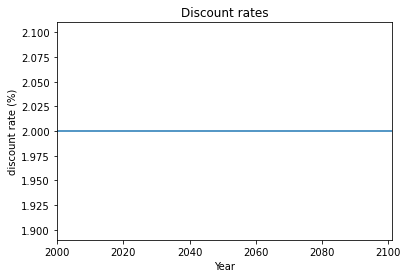

In [12]:
#CLIMADA 1.x.x
#from climada.entity import DiscRates
#CLIMADA 2.0.0
from climada.entity.disc_rates import DiscRates
from climada.util import ENT_TEMPLATE_XLS

# Fill DataFrame from Excel file
file_name = ENT_TEMPLATE_XLS # provide absolute path of the excel file
disc = DiscRates()
disc.read_excel(file_name)
print('Read file:', disc.tag.file_name)
disc.plot()

## Write discount rates

Discount rates defined in an excel file following the template provided in sheet `discount` of `climada_python/data/system/entity_template.xlsx` can be ingested directly using the method `read_excel()`.

In [13]:
#CLIMADA 1.x.x
#from climada.entity import DiscRates
#CLIMADA 2.0.0
from climada.entity.disc_rates import DiscRates
from climada.util import ENT_TEMPLATE_XLS

# Fill DataFrame from Excel file
file_name = ENT_TEMPLATE_XLS # provide absolute path of the excel file
disc = DiscRates()
disc.read_excel(file_name)

# write file
disc.write_excel('results/tutorial_disc.xlsx')

Pickle can always be used as well:

In [5]:
from climada.util.save import save
# this generates a results folder in the current path and stores the output there
save('tutorial_disc.p', disc)

2019-10-29 21:39:55,425 - climada.util.save - INFO - Written file /Users/aznarsig/Documents/Python/climada_python/doc/tutorial/results/tutorial_disc.p
